<a href="https://colab.research.google.com/github/cedro3/pulse/blob/master/Pulse_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pulse_demo

# セットアップ


In [ ]:
# Githubからコードをコピー
!git clone https://github.com/cedro3/pulse.git

Cloning into 'pulse'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 213 (delta 1), reused 0 (delta 0), pack-reused 204
Receiving objects: 100% (213/213), 171.01 MiB | 24.26 MiB/s, done.
Resolving deltas: 100% (92/92), done.


In [ ]:
# ディレクトリをpulseに移す
%cd pulse

/content/pulse


In [ ]:
# フォルダーを作る
import os
os.makedirs('out', exist_ok=True)
os.makedirs('input', exist_ok=True)
os.makedirs('runs', exist_ok=True)

# 関数の定義


In [ ]:
# フォルダー内の画像を表示する
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import glob

def display(DIR):
  files = glob.glob(DIR+'/*.png')
  files.sort()
  fig = plt.figure(figsize=(60, 60))    
  for i, file in enumerate(files):
      img = Image.open(file)
      img_plt = np.asarray(img)
      ax = fig.add_subplot(10, 10, i+1, xticks=[], yticks=[])
      ax.imshow(img_plt)
      ax.set_xlabel(file.replace(DIR+'/',''), fontsize=12)        
  plt.show()
  plt.close()

# 高解像度化テスト1
32×32から1024×1024の高解像度画像を生成する(steps=500)

pic03.jpg: Number of faces detected: 1
pic02.jpg: Number of faces detected: 1
pic01.jpg: Number of faces detected: 1


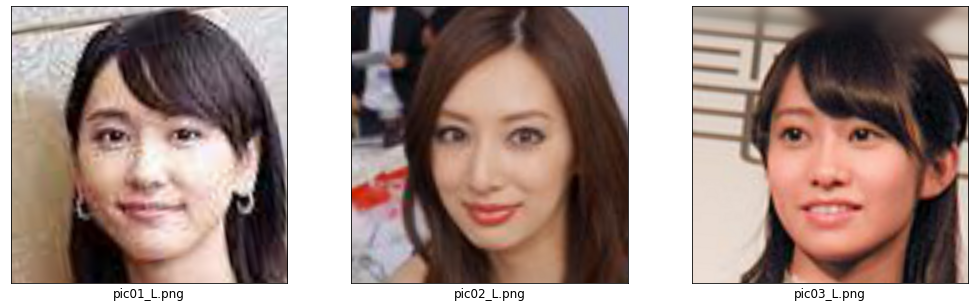

In [ ]:
# サンプル画像から顔画像を切り出す
!python align_face.py -input_dir 'sample/pic' -output_dir 'input' -output_dir2 'out' -output_size=32
display('./out')

Loading Synthesis Network
Optimizing
BEST (500) | L2: 0.0020 | GEOCROSS: 0.9040 | TOTAL: 0.2452 | time: 21.7 | it/s: 23.09 | batchsize: 1
Optimizing
BEST (500) | L2: 0.0020 | GEOCROSS: 0.4137 | TOTAL: 0.2207 | time: 21.7 | it/s: 22.99 | batchsize: 1
Optimizing
BEST (500) | L2: 0.0020 | GEOCROSS: 0.2318 | TOTAL: 0.2116 | time: 21.7 | it/s: 23.02 | batchsize: 1


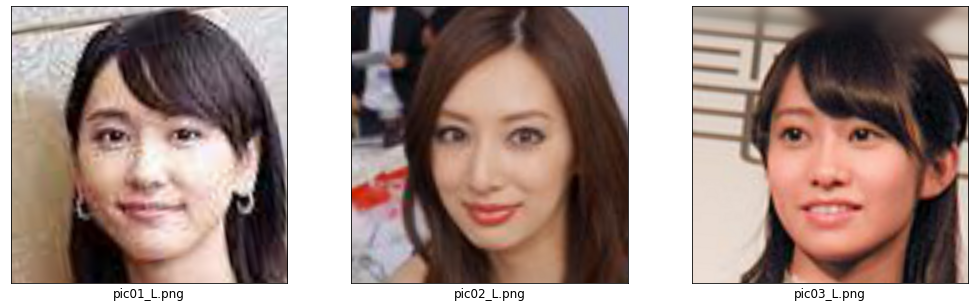

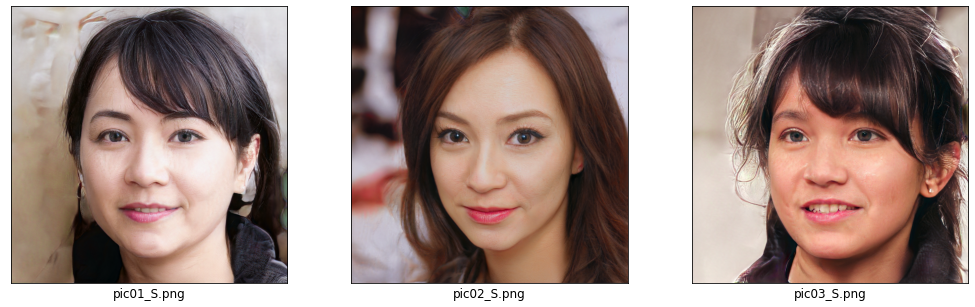

In [ ]:
# 高解像度化 (inputフォルダーの画像を高解像度化し、runsフォルダーへ保存)
!python run.py -input_dir 'input' -output_dir 'runs' -steps 500

# 画像表示
display('./out')
display('./runs')

# 高解像度化テスト２
64×64から1024×1024の高解像度画像を生成する(steps=1000)

pic03.jpg: Number of faces detected: 1
pic02.jpg: Number of faces detected: 1
pic01.jpg: Number of faces detected: 1
Loading Synthesis Network
Optimizing
BEST (1000) | L2: 0.0020 | GEOCROSS: 1.3772 | TOTAL: 0.2689 | time: 42.8 | it/s: 23.38 | batchsize: 1
Optimizing
BEST (1000) | L2: 0.0020 | GEOCROSS: 0.5942 | TOTAL: 0.2297 | time: 42.8 | it/s: 23.37 | batchsize: 1
Optimizing
BEST (1000) | L2: 0.0020 | GEOCROSS: 0.6346 | TOTAL: 0.2317 | time: 42.7 | it/s: 23.41 | batchsize: 1


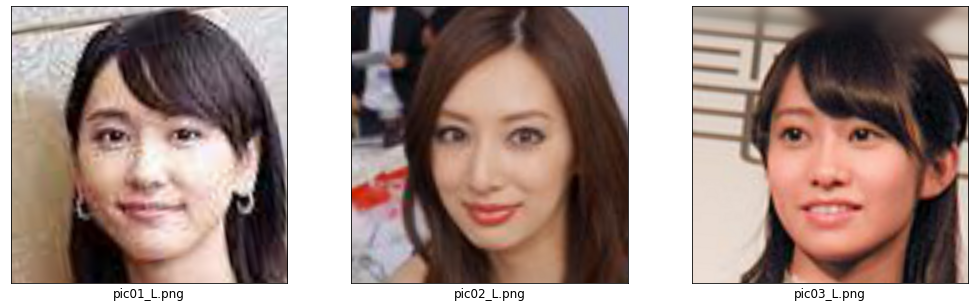

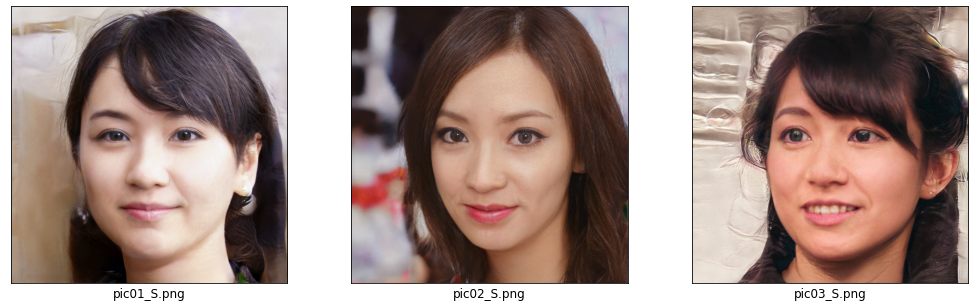

In [ ]:
!python align_face.py -input_dir 'sample/pic' -output_dir 'input' -output_dir2 'out' -output_size=64
!python run.py -input_dir 'input' -output_dir 'runs' -steps 1000
display('./out')
display('./runs')